<a href="https://colab.research.google.com/github/B3CODER/Time_forecasting/blob/main/AAPL_dataset_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping , ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [ ]:
df["Date"] = pd.to_datetime(df.Date , dayfirst =True)
df.set_index("Date" , inplace =True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000


In [ ]:
df=df.asfreq("d")
df = df.fillna(method  = "bfill")

Text(0, 0.5, 'open price')

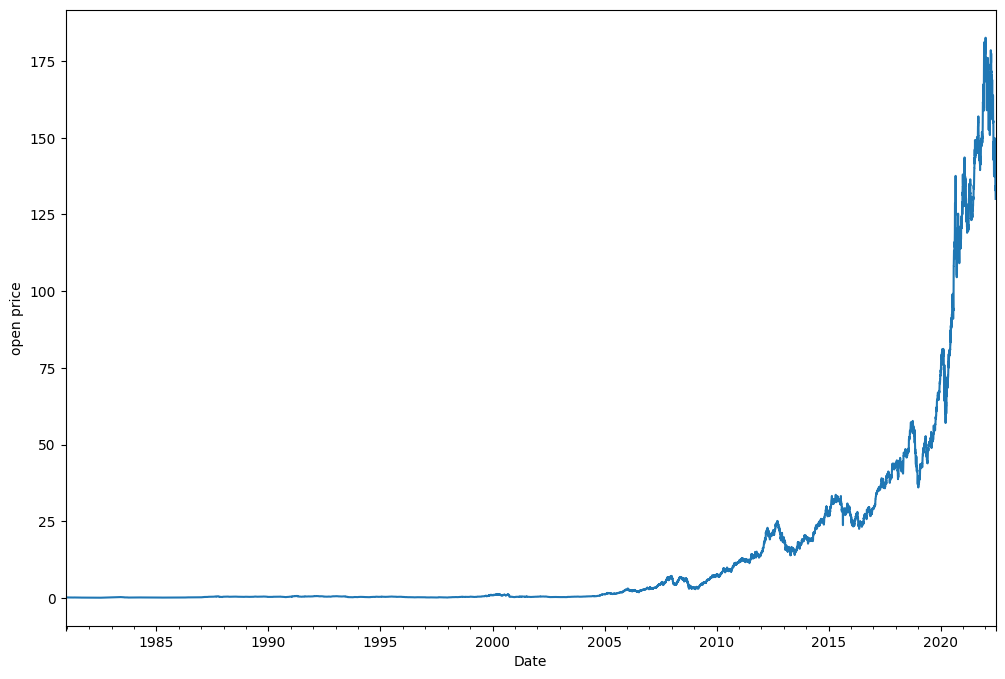

In [ ]:
df['Open'].plot(figsize=(12,8))
plt.ylabel("open price")

In [ ]:
df.resample(rule='A').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-31,0.137890,0.138281,0.137723,0.137723,0.107496,1.006622e+08
1981-12-31,0.108939,0.109297,0.108585,0.108585,0.084753,3.219831e+07
1982-12-31,0.085491,0.086622,0.084597,0.085390,0.066649,7.955891e+07
1983-12-31,0.167658,0.171274,0.163520,0.167363,0.130631,1.705623e+08
1984-12-31,0.119775,0.122088,0.117448,0.119555,0.093316,1.614866e+08
1985-12-31,0.091026,0.091943,0.089874,0.090127,0.070346,1.732520e+08
1986-12-31,0.144779,0.147176,0.142252,0.144956,0.113142,2.032631e+08
1987-12-31,0.347221,0.354814,0.338359,0.346320,0.270834,2.285255e+08
1988-12-31,0.370630,0.376351,0.364757,0.370850,0.292065,1.586265e+08


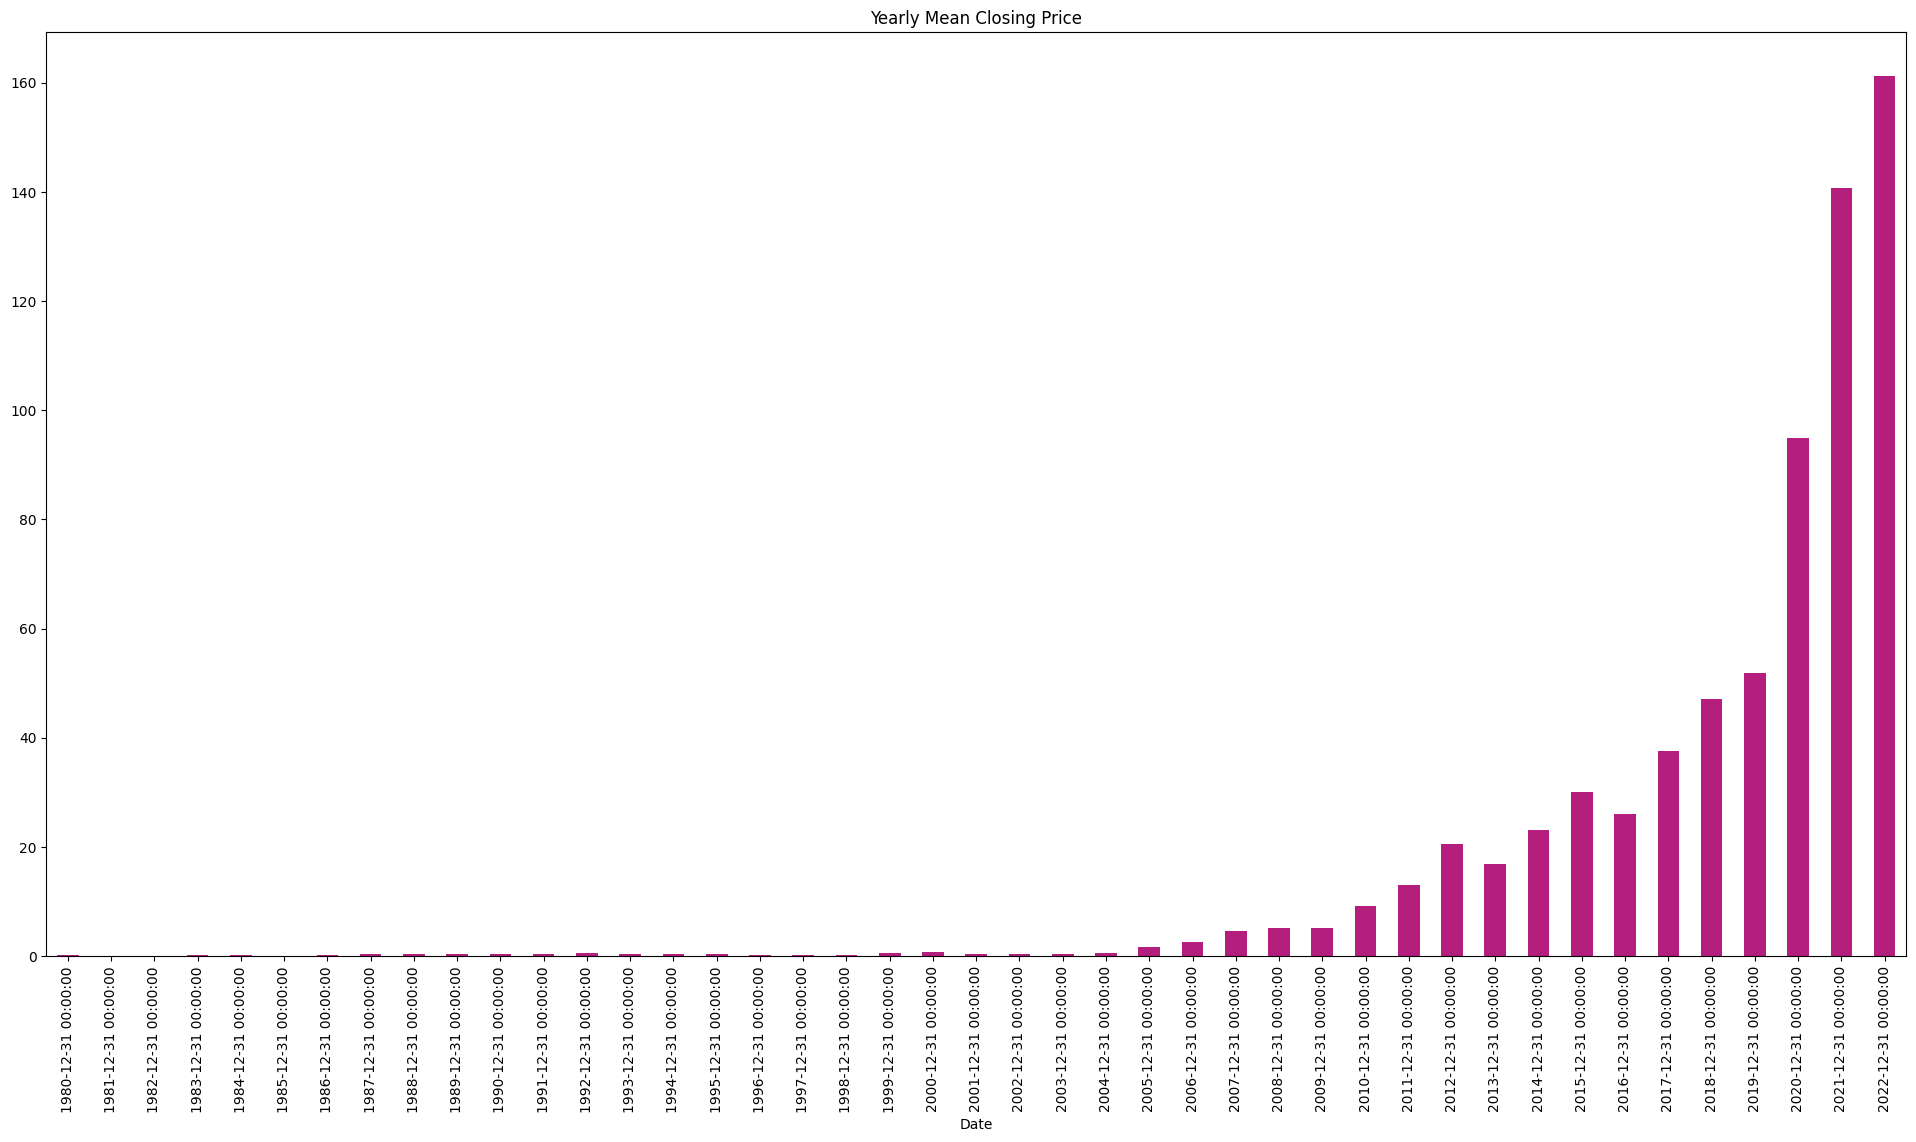

In [ ]:
title = 'Yearly Mean Closing Price'
df['Open'].resample('A').mean().plot.bar(title=title,color=['#b41f7d'] , figsize=(24,12));

In [ ]:
df['6-month-SMA'] =df['Open'].rolling(window =6).mean()
df


,Open,High,Low,Close,Adj Close,Volume,6-month-SMA
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600.0,NaN
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000.0,NaN
...,...,...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100.0,139.091665
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300.0,136.516665
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000.0,134.384997


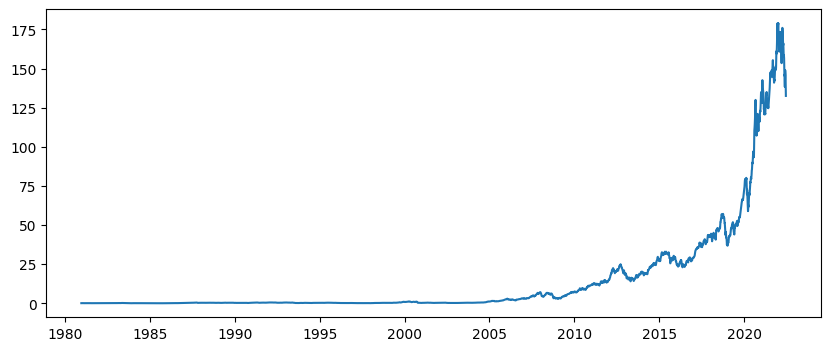

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df["6-month-SMA"])
plt.show()

In [ ]:
df['12-month-SMA'] =df['Open'].rolling(window=12).mean()
df

,Open,High,Low,Close,Adj Close,Volume,6-month-SMA,12-month-SMA
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600.0,NaN,NaN
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN,NaN
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100.0,139.091665,142.893332
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300.0,136.516665,141.668332
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000.0,134.384997,140.617499


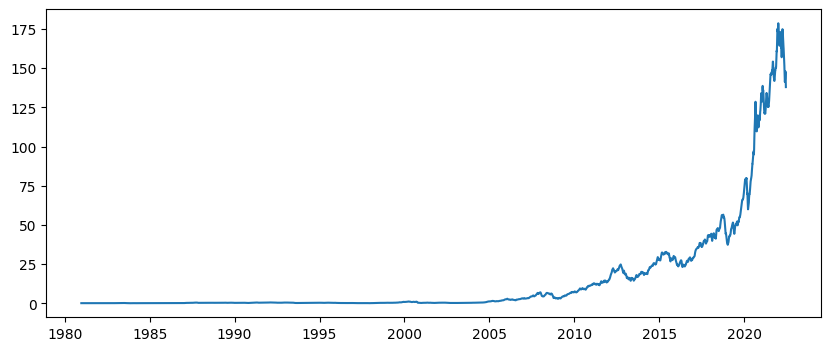

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df["12-month-SMA"])
plt.show()

In [ ]:
df['6-month-SMA'] = df['Open'].rolling(window=6).mean()
df['12-month-SMA'] = df['Open'].rolling(window=12).mean()
df['2-month-SMA'] = df['Open'].rolling(window=2).mean()

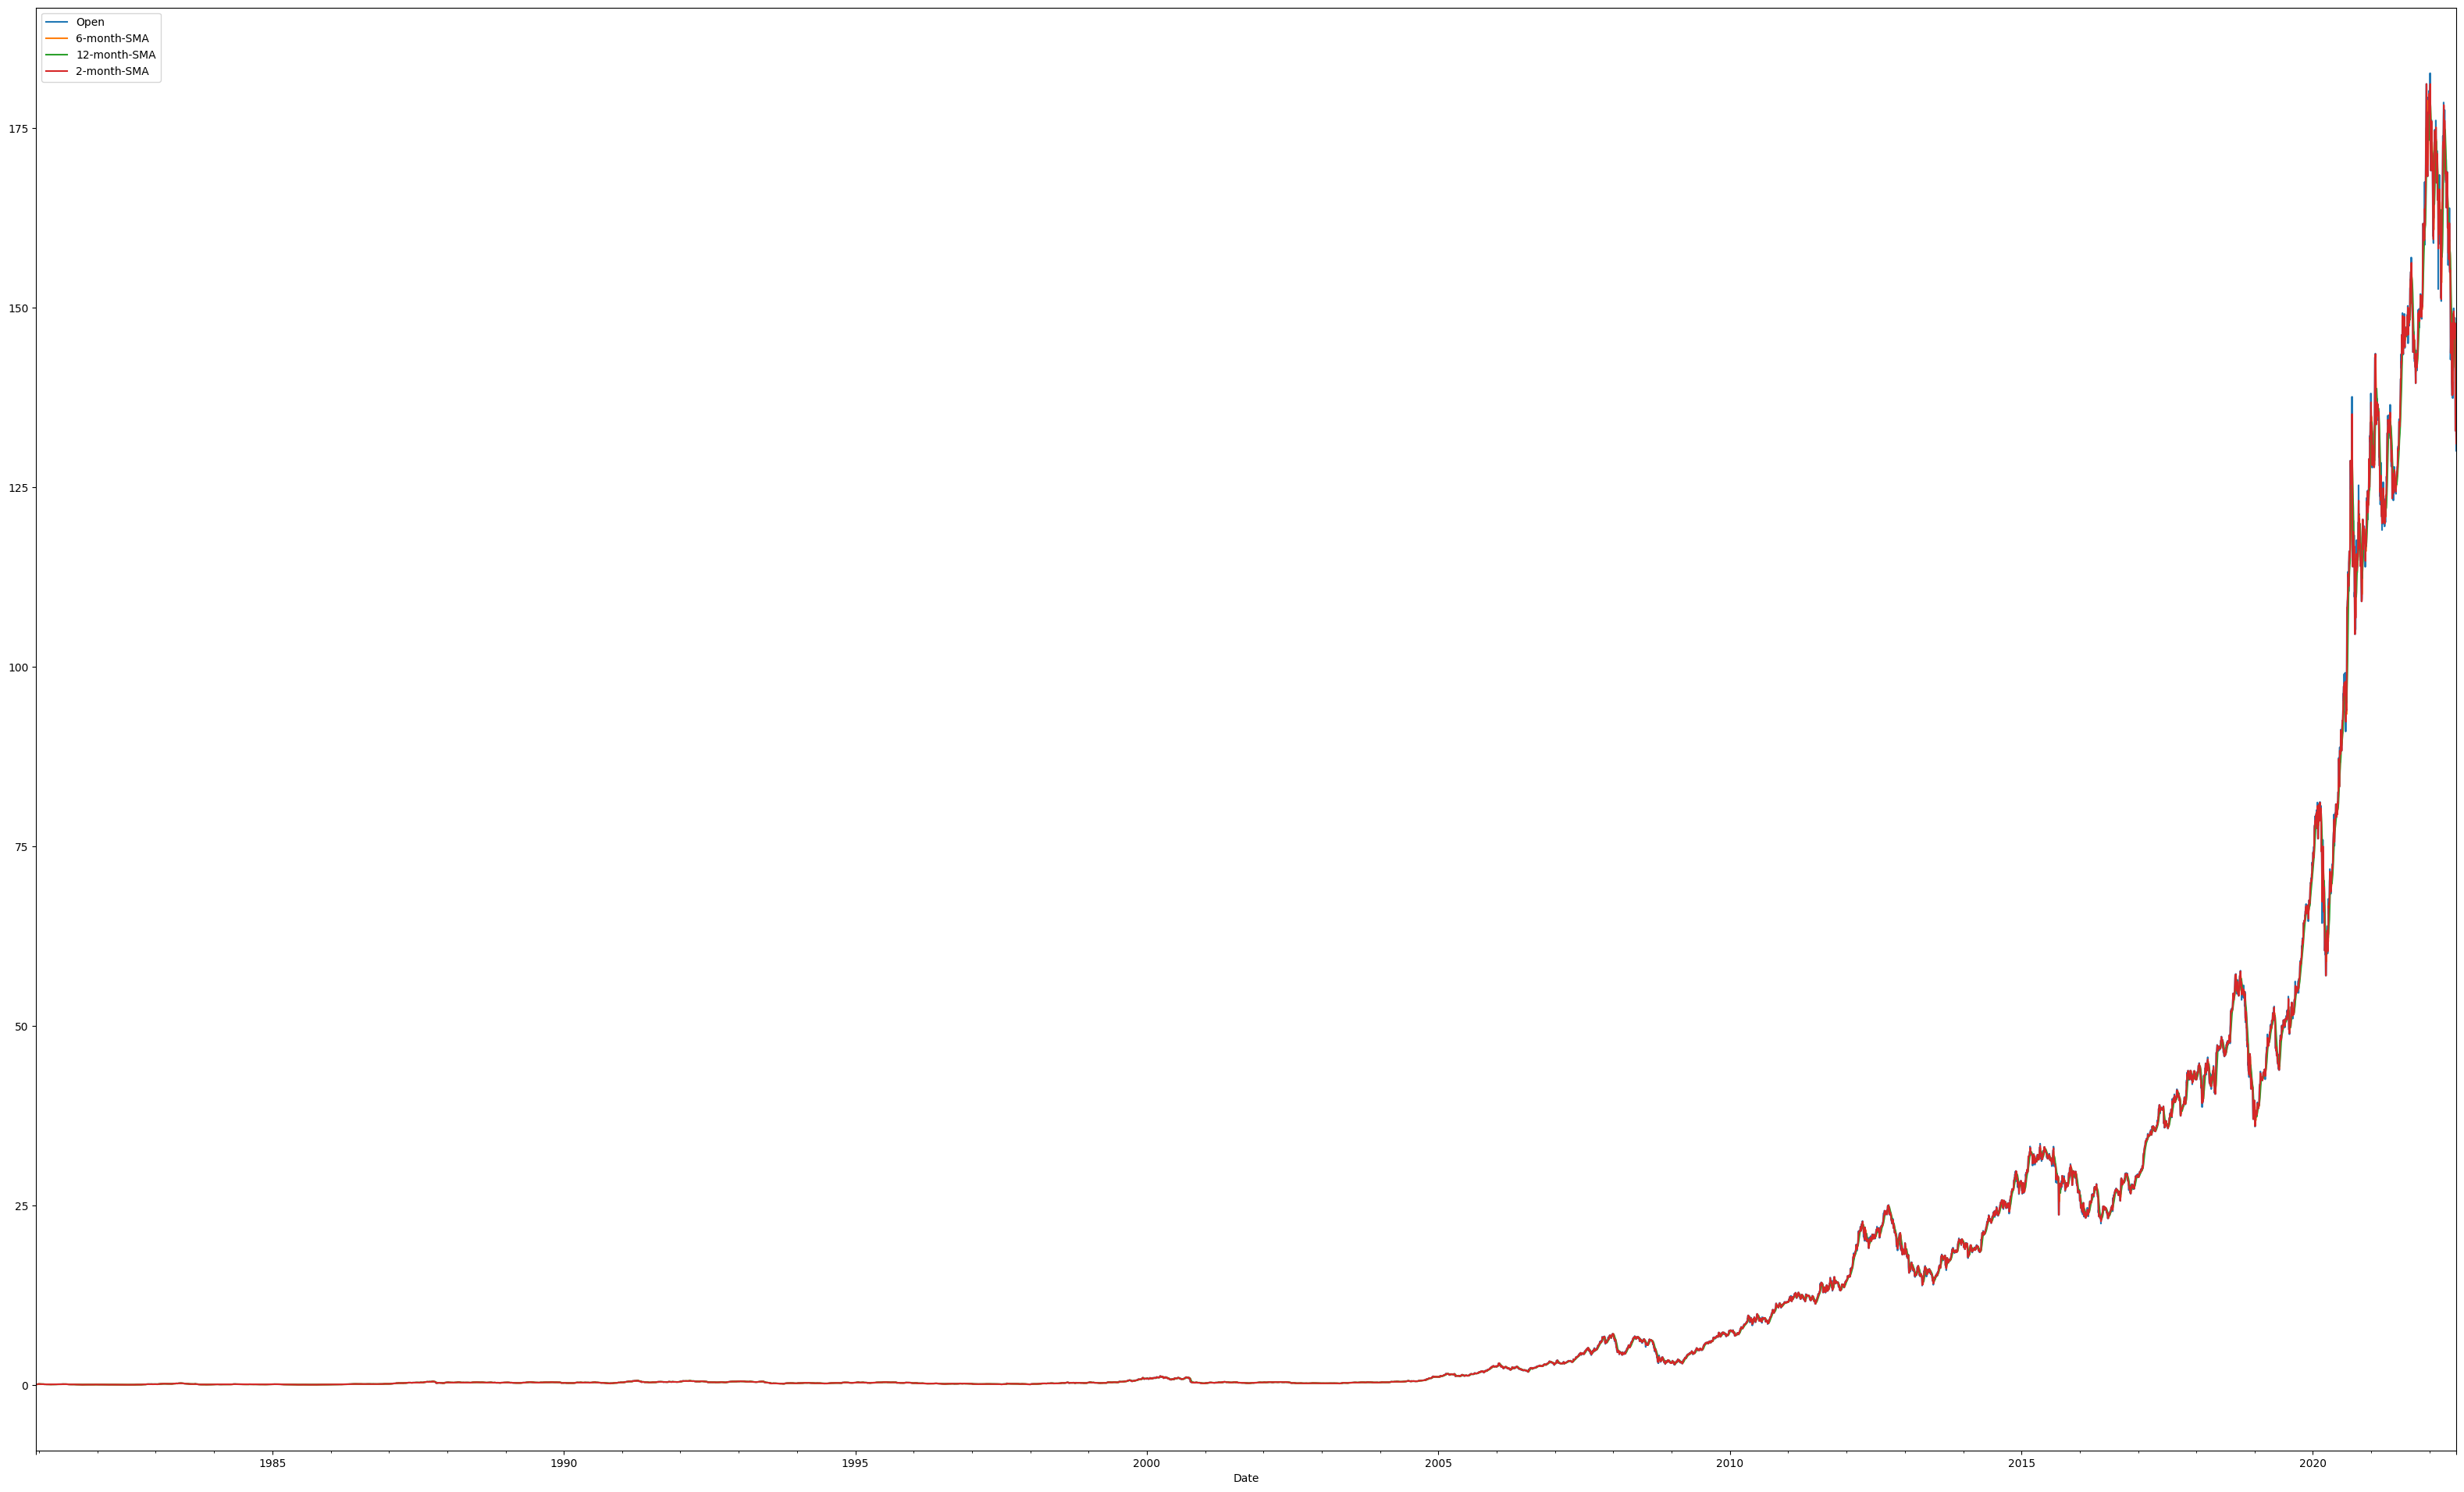

In [ ]:
df[["Open","6-month-SMA","12-month-SMA","2-month-SMA"]].plot(figsize=(40,24));

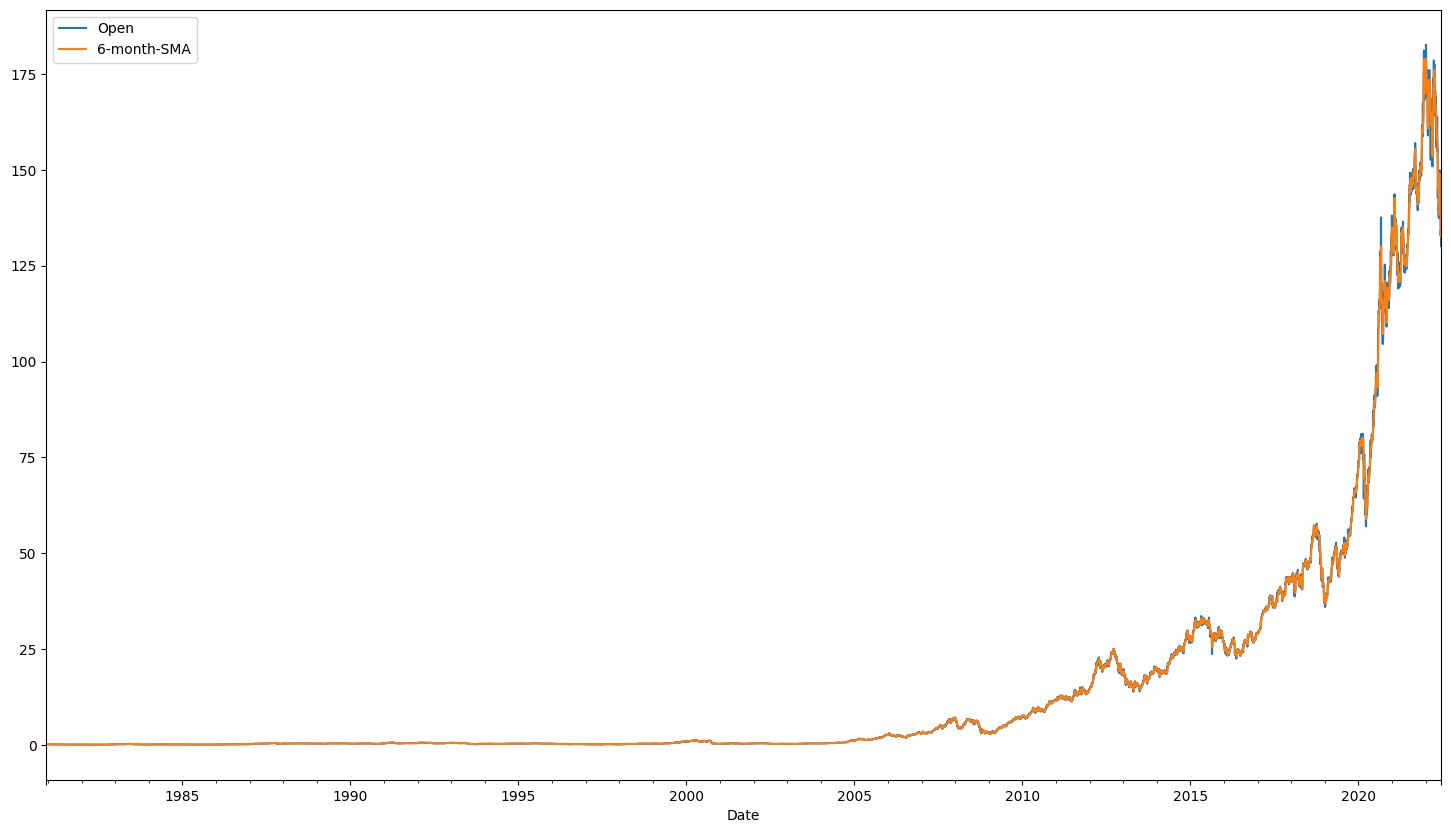

In [ ]:
df[["Open","6-month-SMA"]].plot(figsize=(18,10));

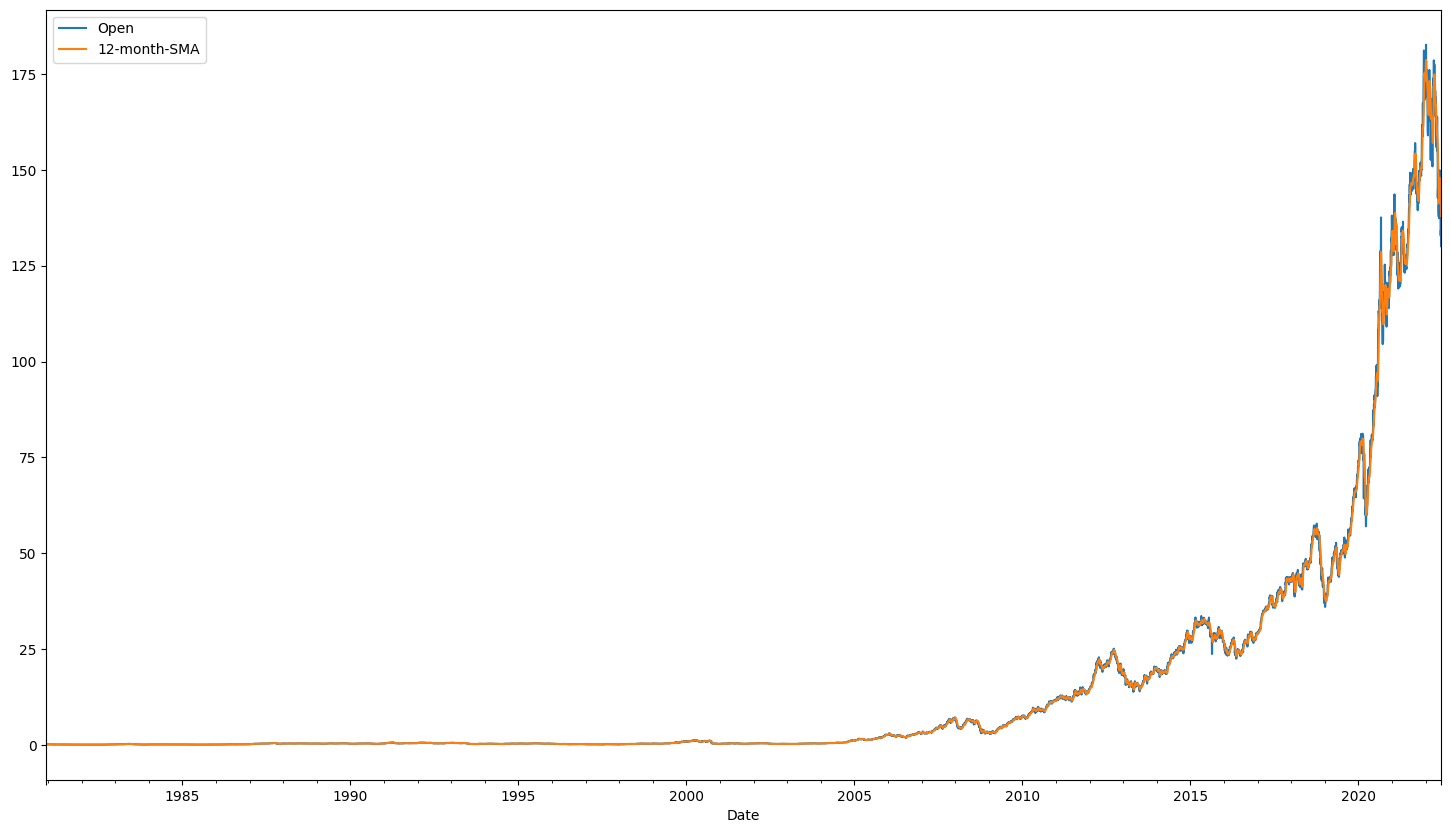

In [ ]:
df[["Open","12-month-SMA"]].plot(figsize=(18,10));

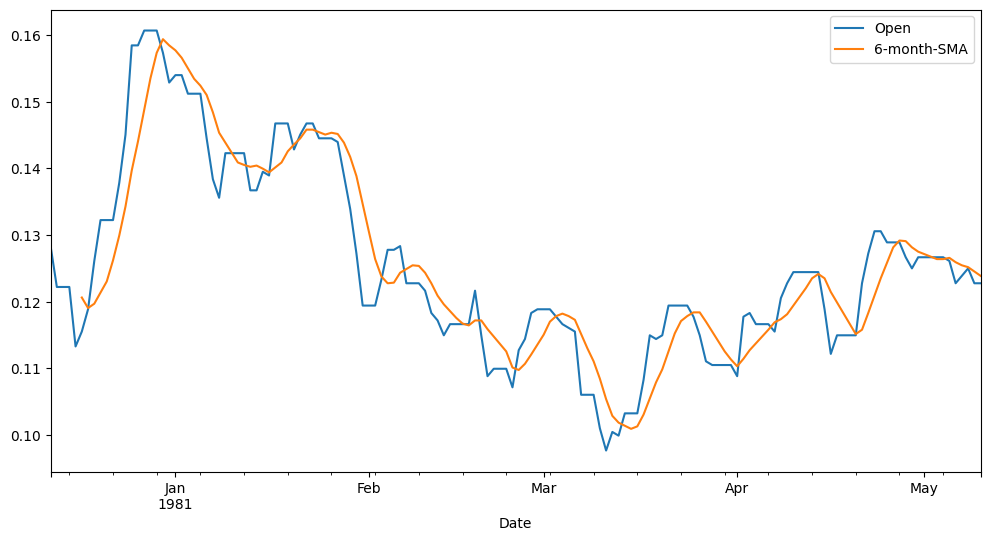

In [ ]:
df[['Open','6-month-SMA']].iloc[:150].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

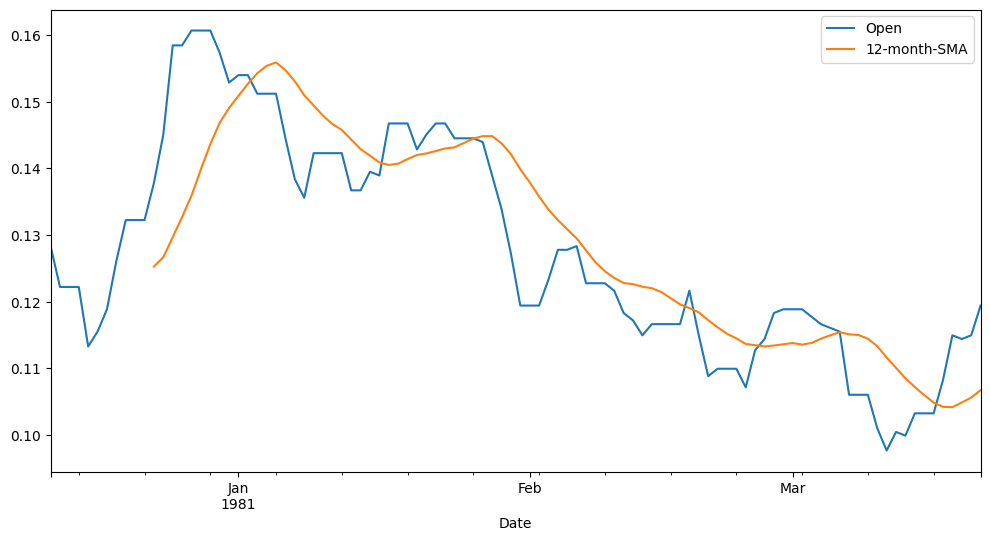

In [ ]:
df[['Open','12-month-SMA']].iloc[:100].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

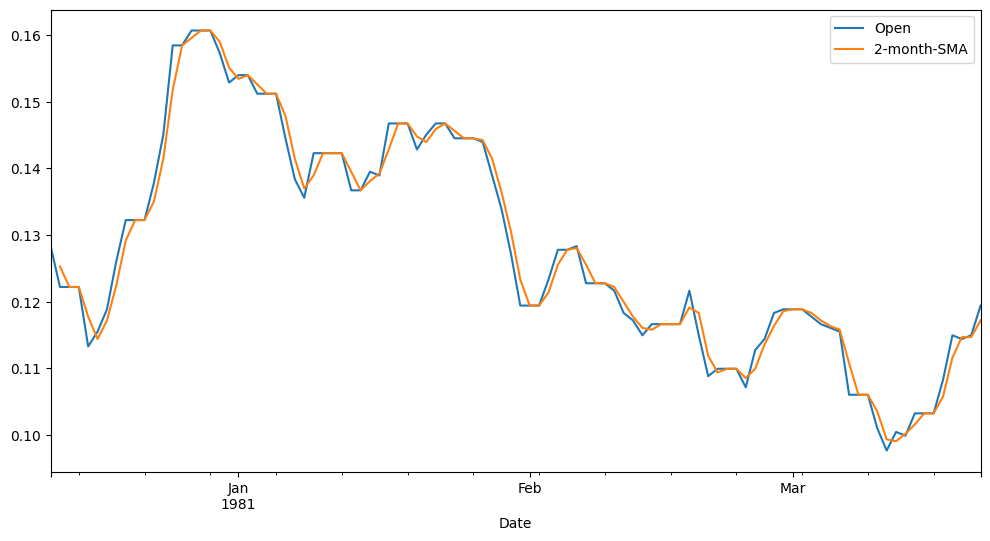

In [ ]:
df[['Open','2-month-SMA']].iloc[:100].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [ ]:
df['EWMA12'] = df['Open'].ewm(span=14,adjust=True).mean()


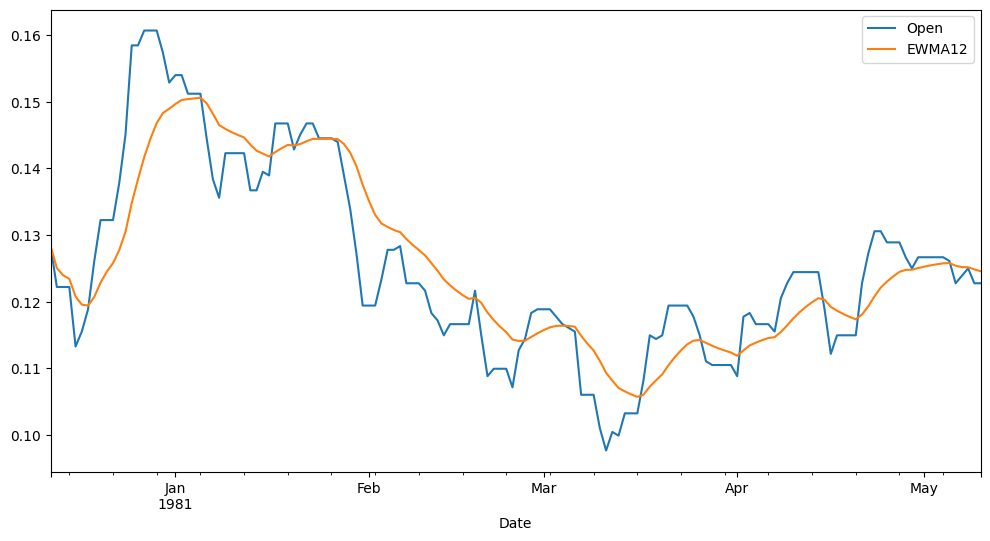

In [ ]:
df[['Open','EWMA12']].iloc[:150].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [ ]:
span=8
alpha = 2/(span+1)
model =SimpleExpSmoothing(df['Open'])
fitted_model = model.fit(smoothing_level = alpha , optimized='adam')

In [ ]:
fitted_model.fittedvalues

Date
1980-12-12      0.124925
1980-12-13      0.125686
1980-12-14      0.124913
1980-12-15      0.124312
1980-12-16      0.123845
                 ...    
2022-06-13    140.496869
2022-06-14    138.802008
2022-06-15    137.541563
2022-06-16    136.818992
2022-06-17    135.765883
Freq: D, Length: 15163, dtype: float64

In [ ]:
df["SES12"]=fitted_model.fittedvalues.shift(-1)

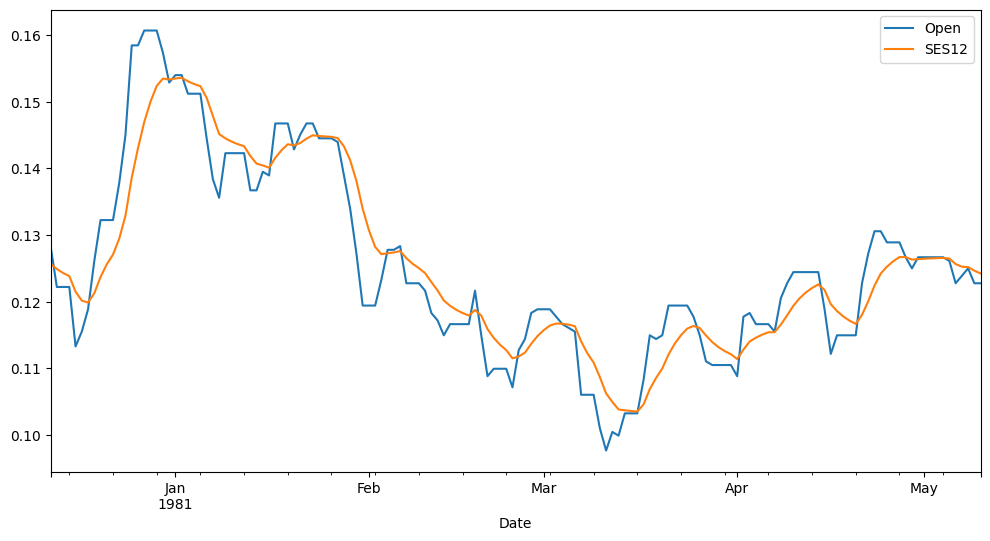

In [ ]:
df[['Open','SES12']].iloc[:150].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [ ]:
df['DESadd12'] = ExponentialSmoothing(df['Open'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12
Date,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600.0,NaN,NaN,NaN,0.128348,0.125686,0.128963
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN,NaN,0.125279,0.125060,0.124913,0.123067
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN,NaN,0.122210,0.123971,0.124312,0.122860
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN,NaN,0.122210,0.123432,0.123845,0.122853
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000.0,NaN,NaN,0.117746,0.120784,0.121498,0.114233


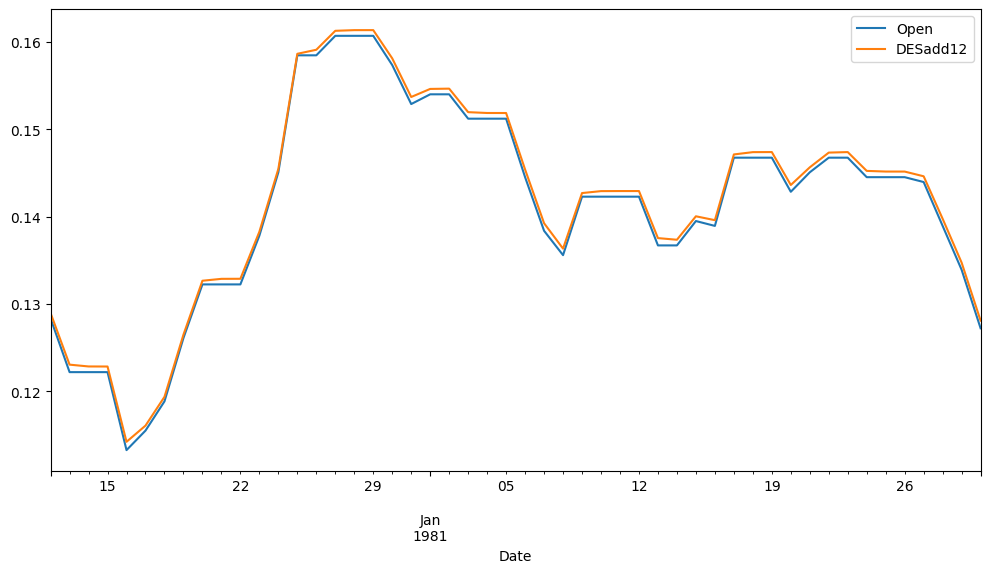

In [ ]:
df[['Open','DESadd12']].iloc[:50].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [ ]:
df['DESmul12'] = ExponentialSmoothing(df['Open'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12,DESmul12
Date,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600.0,NaN,NaN,NaN,0.128348,0.125686,0.128963,0.128682
1980-12-13,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN,NaN,0.125279,0.125060,0.124913,0.123067,0.122479
1980-12-14,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN,NaN,0.122210,0.123971,0.124312,0.122860,0.122255
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,NaN,NaN,0.122210,0.123432,0.123845,0.122853,0.122247
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000.0,NaN,NaN,0.117746,0.120784,0.121498,0.114233,0.113637


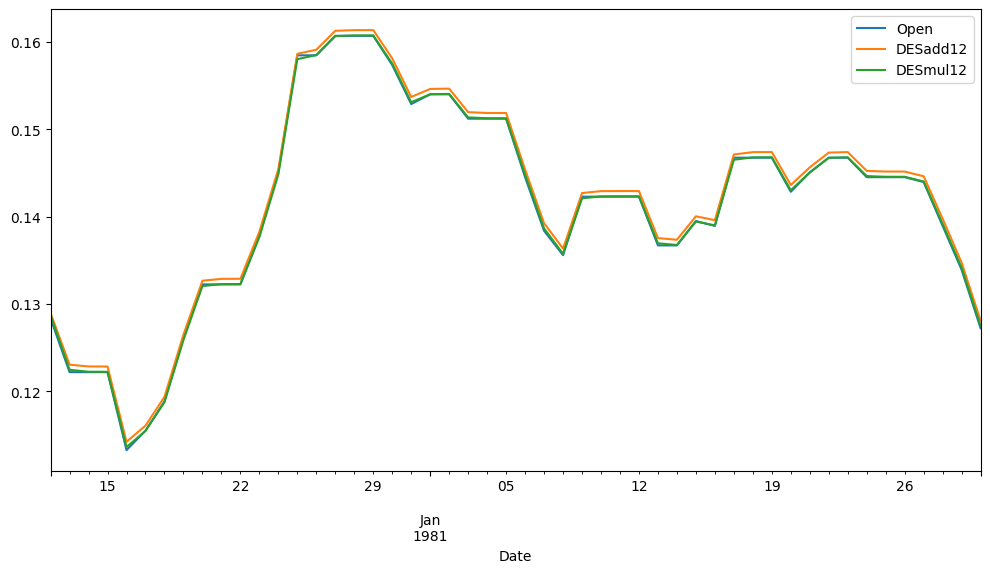

In [ ]:
df[['Open','DESadd12','DESmul12']].iloc[:50].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

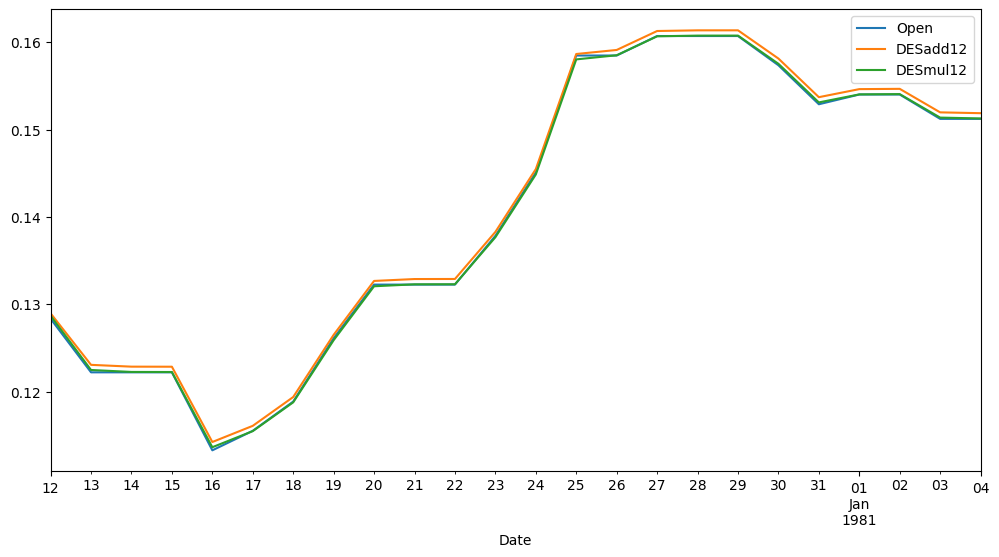

In [ ]:
df[['Open','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

LSTM MODEL


In [ ]:
data = df.filter(['Open'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)* .90))
training_data_len

13647

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.30950014e-04],
       [3.97331936e-04],
       [3.97331936e-04],
       ...,
       [7.35239774e-01],
       [7.23135563e-01],
       [7.12126738e-01]])

In [ ]:
train_data = scaled_data[0: int(training_data_len), : ]
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


x_train , y_train = np.array(x_train) , np.array(y_train)
x_train 

[array([0.00043095, 0.00039733, 0.00039733, 0.00039733, 0.00034843,
       0.00036065, 0.00037899, 0.00041873, 0.00045234, 0.00045234,
       0.00045234, 0.00048291, 0.00052264, 0.000596  , 0.000596  ,
       0.00060822, 0.00060822, 0.00060822, 0.00058988, 0.00056543,
       0.00057155, 0.00057155, 0.00055626, 0.00055626, 0.00055626,
       0.00051958, 0.00048597, 0.00047069, 0.00050736, 0.00050736,
       0.00050736, 0.00050736, 0.0004768 , 0.0004768 , 0.00049208,
       0.00048902, 0.00053181, 0.00053181, 0.00053181, 0.00051042,
       0.00052264, 0.00053181, 0.00053181, 0.00051958, 0.00051958,
       0.00051958, 0.00051653, 0.00048902, 0.00046152, 0.00042484,
       0.00038205, 0.00038205, 0.00038205, 0.00040344, 0.00042789,
       0.00042789, 0.00043095, 0.00040039, 0.00040039, 0.00040039])]
[0.0003942757473230688]

[array([0.00043095, 0.00039733, 0.00039733, 0.00039733, 0.00034843,
       0.00036065, 0.00037899, 0.00041873, 0.00045234, 0.00045234,
       0.00045234, 0.00048291, 0.

array([[0.00043095, 0.00039733, 0.00039733, ..., 0.00040039, 0.00040039,
        0.00040039],
       [0.00039733, 0.00039733, 0.00039733, ..., 0.00040039, 0.00040039,
        0.00039428],
       [0.00039733, 0.00039733, 0.00034843, ..., 0.00040039, 0.00039428,
        0.00037594],
       ...,
       [0.23530921, 0.23637723, 0.2349669 , ..., 0.24319614, 0.23765064,
        0.23332379],
       [0.23637723, 0.2349669 , 0.23752741, ..., 0.23765064, 0.23332379,
        0.22816167],
       [0.2349669 , 0.23752741, 0.24119704, ..., 0.23332379, 0.22816167,
        0.22816167]])

In [ ]:
x_train.shape

(13587, 60)

In [ ]:
# we have to reshape for our model
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(13587, 60, 1)

In [ ]:
model =Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history =model.fit(x_train, y_train, 
                        epochs=10,
                        batch_size=32,
                        )

Epoch 1/10
425/425 [==============================] - 31s 62ms/step - loss: 4.4818e-05
Epoch 2/10
425/425 [==============================] - 26s 61ms/step - loss: 5.0502e-06
Epoch 3/10
425/425 [==============================] - 26s 61ms/step - loss: 5.0543e-06
Epoch 4/10
425/425 [==============================] - 26s 61ms/step - loss: 4.4244e-06
Epoch 5/10
425/425 [==============================] - 26s 61ms/step - loss: 4.3971e-06
Epoch 6/10
425/425 [==============================] - 26s 61ms/step - loss: 4.5601e-06
Epoch 7/10
425/425 [==============================] - 26s 61ms/step - loss: 4.4210e-06
Epoch 8/10
425/425 [==============================] - 26s 61ms/step - loss: 3.4478e-06
Epoch 9/10
425/425 [==============================] - 26s 61ms/step - loss: 3.6683e-06
Epoch 10/10
425/425 [==============================] - 26s 61ms/step - loss: 3.1787e-06


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)
print(mean_absolute_error(y_test, predictions))

48/48 [==============================] - 2s 18ms/step
3.2092791799716625
2.1448993193340047


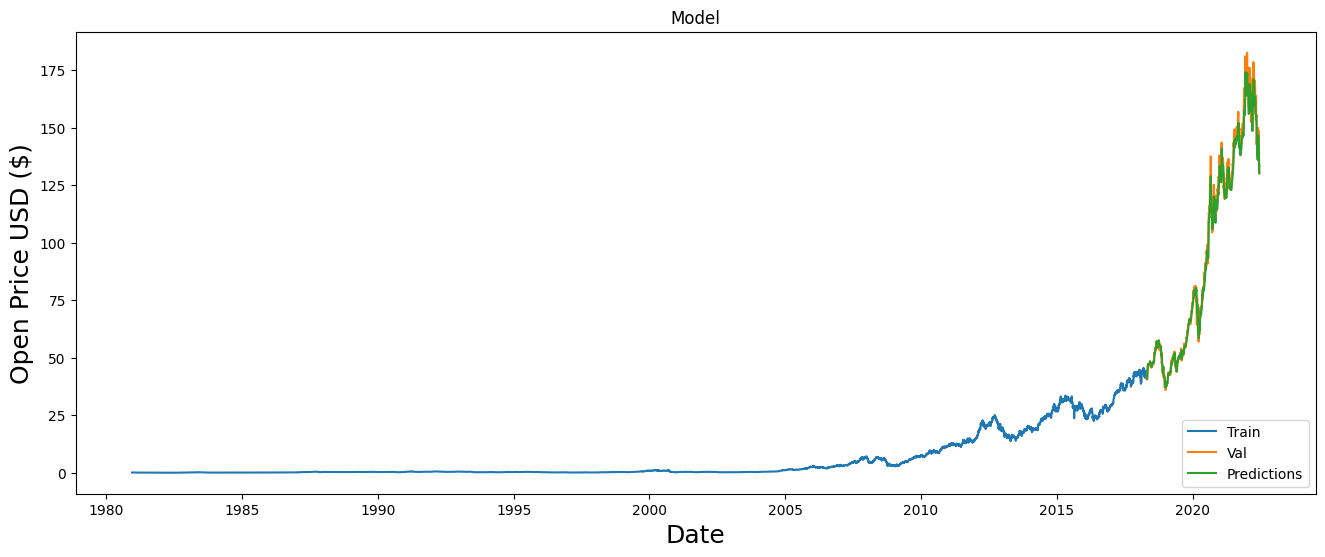

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

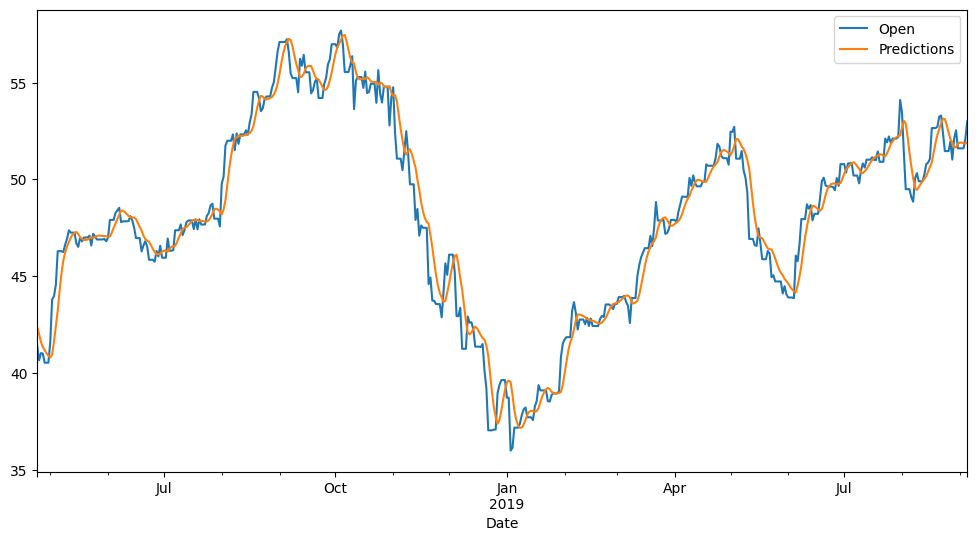

In [ ]:
valid[['Open','Predictions']].iloc[:500].plot(figsize=(12,6)).autoscale(axis='x',tight=True);